In [13]:
import osmnx as ox
import json
import pickle as pkl
import math
import numpy as np
import matplotlib.pyplot as plt

In [15]:
with open("./places.json") as fin:
    places = json.load(fin)

print(places[0])
with open(f"./data/networks/{places[0][1]}.pkl", "rb") as fin:
    G = pkl.load(fin)
    G = ox.project_graph(G)

['Harvard Square', 'harvard_square']


In [ ]:
nodes, edges = ox.graph_to_gdfs(G)
print(f"Graph has {len(nodes)} nodes, {len(edges)} edges")

Graph has 27222 nodes, 78331 edges


In [16]:
edges.head(1)

,,,osmid,highway,oneway,reversed,length,geometry,lanes,name,width,bridge,access,tunnel,maxspeed,service,area,landuse
u,v,key,,,,,,,,,,,,,,,,
61172479,7932011607,0,99973036,footway,False,True,3.172,"LINESTRING (325545.639 4696806.298, 325544.079...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
u, v = 61172479, 7932011607
print(edges.loc[u].loc[v].geometry)
print(edges.loc[v].loc[u].geometry)
print()

print(nodes.loc[u])
print(nodes.loc[v]) 

key
0    LINESTRING (325545.639 4696806.298, 325544.079...
Name: geometry, dtype: geometry
key
0    LINESTRING (325544.079 4696803.537, 325545.639...
Name: geometry, dtype: geometry

y                                             4696806.29764
x                                             325545.638569
street_count                                              1
lon                                              -71.119905
lat                                               42.403963
highway                                                 NaN
ref                                                     NaN
geometry        POINT (325545.6385690479 4696806.297640038)
Name: 61172479, dtype: object
y                                            4696803.536522
x                                             325544.079142
street_count                                              4
lon                                              -71.119923
lat                                               42.403938
highway

In [12]:
edges.loc[u,v]

/tmp/ipykernel_10156/2781173476.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  edges.loc[u,v]


,osmid,highway,oneway,reversed,length,geometry,lanes,name,width,bridge,access,tunnel,maxspeed,service,area,landuse
key,,,,,,,,,,,,,,,,
0,99973036,footway,False,True,3.172,"LINESTRING (325545.639 4696806.298, 325544.079...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
def angle(linestring):
    """Get angle between two end points, in radians"""
    a, b = linestring.coords[:2]
    if np.isclose(a[0], b[0]): return np.pi / 2
    return math.atan2(b[1] - a[1], b[0] - a[0])

In [7]:
angle(edges.iloc[20].geometry)

-1.320561384655719

(325901.5010064437, 4693812.436289099)


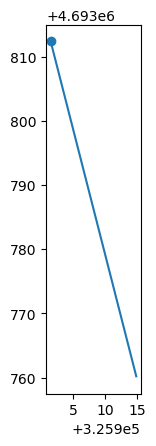

In [8]:
edges.iloc[20:21].plot()
print(edges.iloc[20].geometry.coords[0])
plt.plot(*edges.iloc[20].geometry.coords[0], "o")

In [10]:
G.get_edge_data(u, v)

{0: {'osmid': 99973036,
  'highway': 'footway',
  'oneway': False,
  'reversed': True,
  'length': 3.172}}